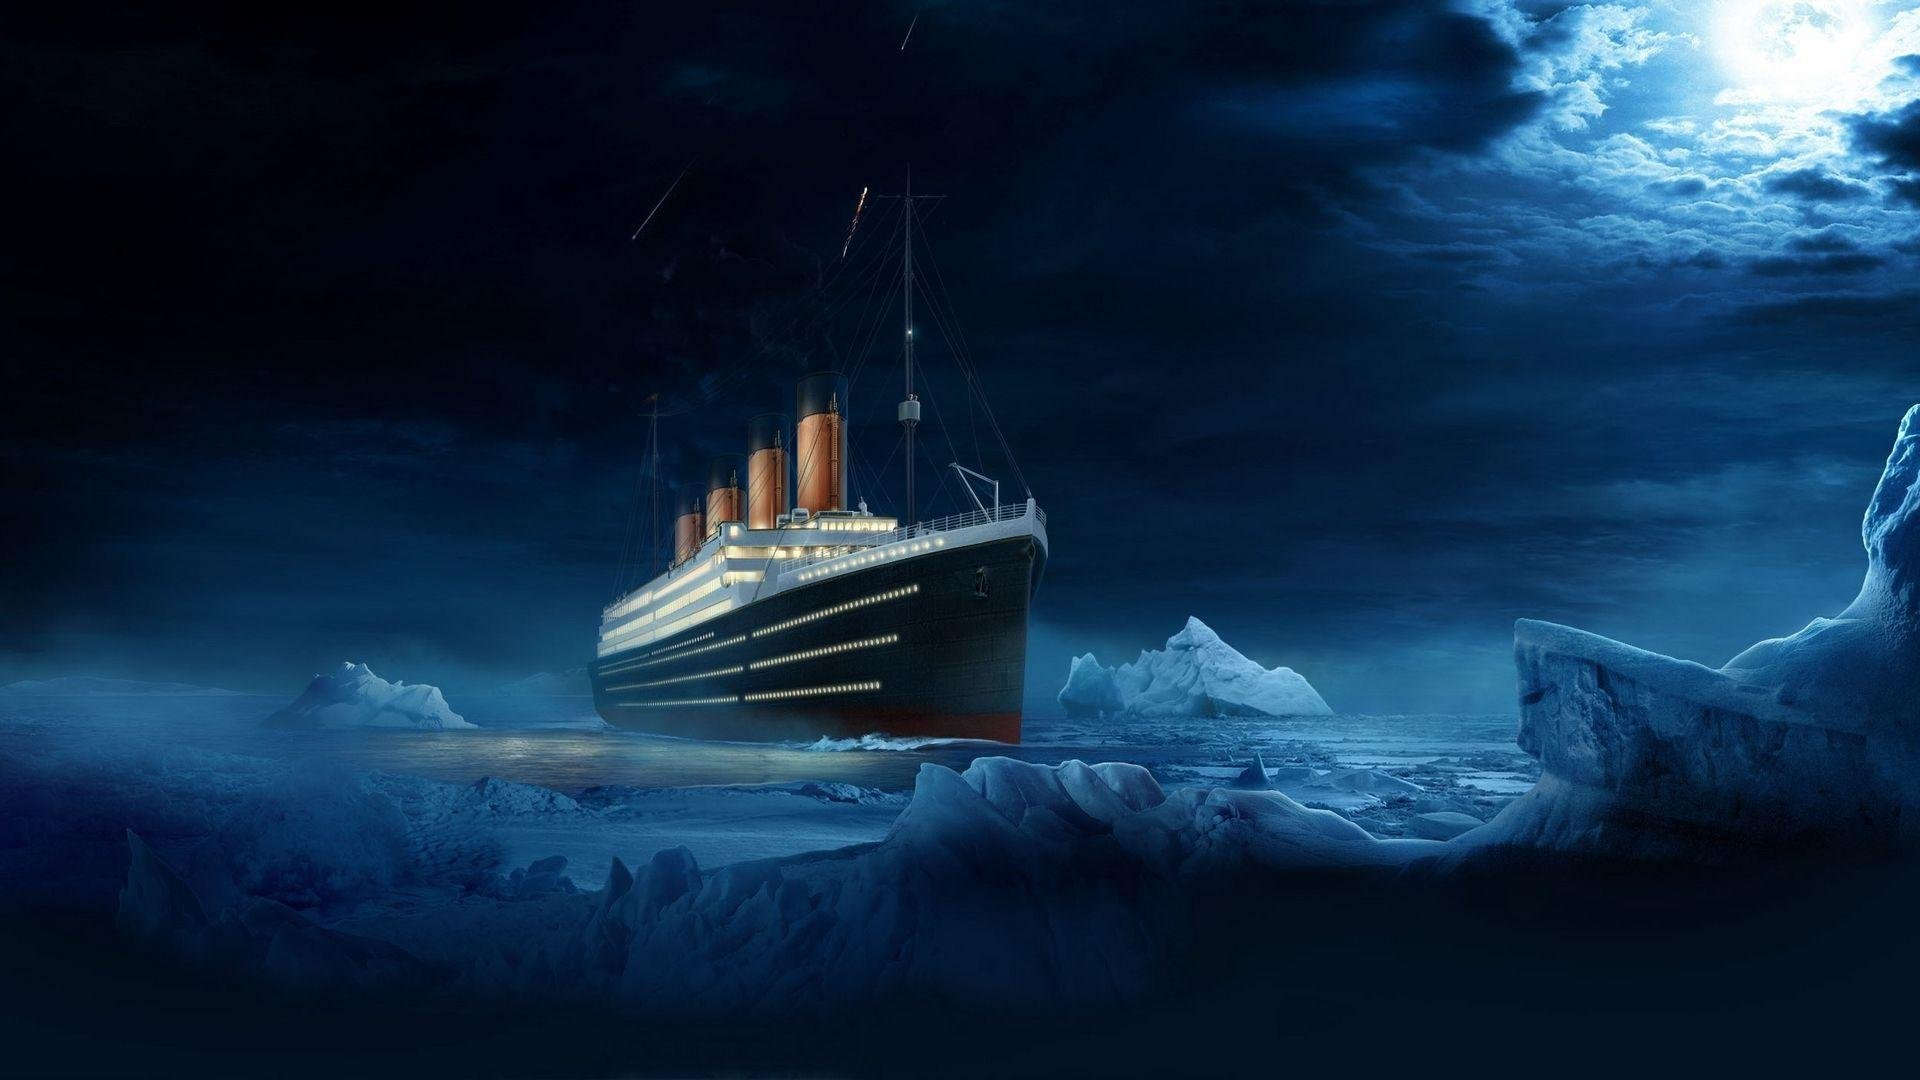

# Решение задачи Titanik на Kaggle

В этом ноутбуке мы напишем код для решения конкурса "Титаник" на платформе Kaggle. Ссылка на конкурс: https://www.kaggle.com/c/titanic

План работы такой:
- скачать и загрузить тренировочные и тестовые данные
- предобработать тренировочные данные
- обучить модель на тренировочных данных
- предобработать тестовые данные
- получить предсказания модели на тестовых данных
- записать предскзания модели в csv файл 
- отправить csv файл на Kaggle 

Начнем с первого пункта:

## Загрузка данных

Импортируем нужные библиотеки:

In [1]:
import numpy as np
import pandas as pd

Загружаем тренировочные данные:

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделим датасет на признаки и целевую переменную:

In [3]:
y = df['Survived']
data = df.drop(columns=['Survived'])

Выведем информацию о данных: есть ли в данных пропуски и какие переменные являются категориальными (их нужно будет привести в числовой вид):

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Видим, что пропуски есть в колонках Age, Cabin, Embarked, а категориальными являются переменные Name, Sex, Ticket, Cabin и Embarked. 

Давайте предобработаем данные прежде чем обучать модель:

## Предобработка тренировочных данных

В этом ноутбуке мы не будем сильно заморачиваться с предобработкой признаков и пытаться сделать ее как можно лучше. Этим вы сможете заняться самостоятельно после этого урока. Давайте предобработаем данные самым простым способом.

### Удаление ненужных признаков

Во-первых, удалим колонки PassengerId, Name, Ticket, Cabin. Эти колонки не несут полезной информации для модели.

In [5]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Посмотрим, какие колонки у нас остались с пропусками и какие остались категориальными:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


Осталось предобработать колонки Sex, Age и Embarked.

### Заполнение пропусков

Заполним пропуски в колонках Age и Embarked.

В колонке Age заполним пропуски средним значением возраста пассажиров из тренировочных данных:

In [7]:
fill_value = np.mean(data['Age'])
data['Age'] = data['Age'].fillna(fill_value)

В колонке Embarked заполним пропуски самым часто встречающимся значением. Выведем, сколько раз каждое значение встречается в колонке:

In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Видим, что самое частое значение — S. Им и заполним пропуски в колонке Embarked:

In [9]:
data['Embarked'] = data['Embarked'].fillna('S')

Посмотрим, что получилось:

In [10]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Убедимся, что пропусков в тренировочных данных не осталось:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


Отлично. Осталось привести категориальные колонки в числовой вид.

### Перевод категориальных признаков в числовые

У нас есть два категориальных признака: Sex и Embarked. Переведем их в числовые с помощью LabelEncoder из Sklearn:

In [12]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(data['Sex'])
data['Sex'] = le_sex.transform(data['Sex'])

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [13]:
le_embarked = LabelEncoder()
le_embarked.fit(data['Embarked'])
data['Embarked'] = le_embarked.transform(data['Embarked'])

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


Убедимся, что в данных не осталось категориальных колонок:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Отлично. Можно обучать модель!

## Обучаем модель машинного обучения

Давайте обучим две модели машинного обучения — логистическую регрессию и KNN, — и с помощью кросс-валидации оценим их качество. Затем получим с их помощью овтеты на тестовой выборке и отправим ответы на Kaggle.

Это очень простой подход к выбору модели. Но подбор модели машинного обучения и гиперпараметров не является целью сегодняшнего занятия. Самостоятельно вы можете поэкспериментировать с этим ноутбуком: реализовать лучшую предобработку признаков и выбор модели, и постараться получить лучшее качество предсказаний на тесте на Kaggle.

Импортируем модели и кросс-валидацию из Sklearn:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Проведем кросс-валидацю логистической регрессии:

In [16]:
lr = LogisticRegression()

cross_val_scores = cross_val_score(lr, data, y, cv=5, scoring='accuracy')
print("Значения метрики accuracy на кросс-валидации:", cross_val_scores)
print("Среднее значение метрики accuracy на кросс-валидации:", np.mean(cross_val_scores))

Значения метрики accuracy на кросс-валидации: [0.78212291 0.78089888 0.78089888 0.76966292 0.82022472]
Среднее значение метрики accuracy на кросс-валидации: 0.786761659657272


Проведем кросс-валидацию KNN с количеством ближайших соседей 5:

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

cross_val_scores = cross_val_score(knn, data, y, cv=5, scoring='accuracy')
print("Значения метрики accuracy на кросс-валидации:", cross_val_scores)
print("Среднее значение метрики accuracy на кросс-валидации:", np.mean(cross_val_scores))

Значения метрики accuracy на кросс-валидации: [0.65363128 0.65168539 0.70786517 0.74157303 0.71910112]
Среднее значение метрики accuracy на кросс-валидации: 0.694771200803465


Обучим обе модели на всем тренировочном датасете:

In [18]:
lr.fit(data, y)
knn.fit(data, y)

KNeighborsClassifier()

Отлично, теперь у нас есть обученные на тренировочном датасете модели. Осталось предобработать тестовый датасет и получить на нем предсказания этих моделей.

## Предобработка тестовых данных

Тестовые данные должны быть предобработаны строго так же, как тренировочные. 
- Должны быть удалены те же колонки, что мы удалили в тренировочных данных
- Пропуски должны быть заполнены теми же значениями, что мы заполняли их в тренировочных данных
- Категориальные переменные должны быть переведены в числовые тем же самым способом, что мы переводили их в тренировочных данных

Загрузим тестовые данные:

In [19]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Обратите внимание, что в тестовых данных нет колонки Survived — эту колонку нам и надо предсказать для конкурса.

### Удаление колонок

Удалим из тестовых данных те же колонки, что удалили из обучающих:

In [20]:
data_test = data_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Заполнение пропусков

Заполнить пропуски нужно точно теми же значениями, что мы заполняли в тренировочных данных:

In [21]:
data_test['Age'] = data_test['Age'].fillna(fill_value)
data_test['Embarked'] = data_test['Embarked'].fillna('S')

Выведем информацию о тестовых данных. Вдруг в них есть пропуски еще в каких-то колонках, в которых не было пропусков в тренировочных данных:

In [22]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


Действительно, видим, что один пропуск есть в колонки Fare. Его тоже нужно заполнить. Заполним мы его средним значением признака Fare из **тренировочных** данных

In [23]:
data_test['Fare'] = data_test['Fare'].fillna(np.mean(data['Fare']))

Все, пропусков нет. осталось перевести категориальные переменные тестовых данных в числовые.

### Перевод категориальных признаков в числовые

Категориальные признаки в тестовых данных те же — Sex и Embarked. Их мы перевоедем в числовые, используя функцию transform тех LabelEncoder'ов, что мы обучили на трнировочных данных:

In [24]:
data_test['Sex'] = le_sex.transform(data_test['Sex'])
data_test['Embarked'] = le_embarked.transform(data_test['Embarked'])

Готово. посмотрим на данные:

In [25]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [26]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


Отлично, можно получать предсказания моделей на тестовых данных.

## Получаем предсказания моделей на тестовых данных

### Получение предсказаний моделей

Получим предсказания моделей логистической регрессии и KNN на тестовых данных:

In [27]:
y_pred_lr = lr.predict(data_test)
y_pred_knn = knn.predict(data_test)

In [28]:
y_pred_lr

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Запись предсказаний в файл для посылки на Kaggle

В записи предсказаний моделей в файлы для посылки на Kaggle нам поможет файл gender_submission.csv. Откроем его:

In [29]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Файл gender_submission.csv показывает, в каком формате нужно отправлять ответы на Kaggle. Видим, что формат — это для каждого id пассажира из столбца PassengerId заполнить его значение в колонке Survived – 0 или 1.

Давайте просто заменим значения в колонке Survived таблицы gender_submission.csv на наши предсказания моделей:

Получаем датафрейм с предсказаниями логистической регрессии:

In [30]:
submission['Survived'] = y_pred_lr
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Записываем таблицу в файл для отправки на Kaggle:

In [31]:
submission.to_csv('submission_lr.csv', index=None)

Получаем датафрейм с предсказаниями логистической регрессии:

In [32]:
submission['Survived'] = y_pred_knn
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


Записываем таблицу в файл для отправки на Kaggle:

In [33]:
submission.to_csv('submission_knn.csv', index=None)

Все, теперь можно отправить эти файлы на Kaggle и узнать значение метрики accuracy и позицию в рейтинге.

Вы самостоятельно можете попробовать улучшить пайплайн: предобработку признаков и выбор модели машинного обучения, чтобы улучшить позицию в рейтинге на Kaggle.

## Полезные ссылки

- [Статья "Изучаем Kaggle"](https://tproger.ru/translations/kaggle-competitions-introduction/)
- [Рассказ о решении задачи о CV на Kaggle](https://habr.com/ru/post/307078/)
- [Статья про Kaggle для начинающего дата саентиста](https://skillbox.ru/media/code/kaggle_dlya_nachinayushchego_data_sayentista_sorevnovatsya_nelzya_uchitsya/)

Другие платформы для соревнований:
- [boosters.pro](https://boosters.pro)
- [All Cups](https://cups.online/ru/)
- [competitions.codalab.org](https://competitions.codalab.org)
- [статья с обзором нескольких платформ для соревнований](https://habr.com/ru/company/skillfactory/blog/536828/)
- часто бывают конкурсы от конкретных компаний / конференций и на других платформах